<a href="https://colab.research.google.com/github/Tora0407/Challenge-TelecomX-Fase1/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd
import numpy as np

## 1.1 Extracción de datos

In [2]:
df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## 2.1 Conoce el conjunto de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


⚠️ Se observa que los datos se encuentran en diccionarios (`customer`, `phone`, `internet`, `account`), por lo tanto hay que normalizarlos

In [4]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

#verificamos si se realizó la normalización
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


✅ Ahora eliminaremos los diccionarios del dataframe principal y agregaremos los datos normalizados

In [5]:
#Eliminamos las columnas con los diccionarios
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)
#Concatenamos al dataframe las nuevas columnas
df = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4008,5481-NTDOH,No,Female,1,Yes,No,67,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),107.05,7142.5
4723,6475-VHUIZ,No,Female,0,Yes,No,23,Yes,No,DSL,...,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,54.25,1221.55
4660,6379-RXJRQ,Yes,Male,0,Yes,No,10,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.10,659.65
1730,2460-FPSYH,Yes,Female,1,No,No,40,No,No phone service,DSL,...,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,55.80,2109.35
2770,3838-OZURD,Yes,Male,0,Yes,No,66,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.00,7133.25


✅ Ahora vemos que las columnas coinciden con el diccionario brindado

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##2.2 Comprobación de incoherencias en los datos

In [7]:
#Verificamos duplicados
df.duplicated().sum()

np.int64(0)

In [8]:
#Verificamos valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [9]:
#Verificamos valores únicos
pd.unique(df['Churn'])

array(['No', 'Yes', ''], dtype=object)

⚠️ OJO: Observamos que en `Churn` hay como valor único un String vacío, veamos cuántos hay en total

In [10]:
(df['Churn']=='').sum()

np.int64(224)

✅ Ahora veamos cuantos valores vacíos o espacios hay en las columnas

In [11]:
columnas = ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total']
cantidad_nulos = []
cantidad_espacios = []
for c in columnas:
  cantidad_nulos.append((df[c] == '').sum())
  cantidad_espacios.append((df[c] == ' ').sum())

df_nulos = pd.DataFrame({'columna': columnas, 'Nulos': cantidad_nulos, 'Espacios': cantidad_espacios})
df_nulos

,columna,Nulos,Espacios
0,customerID,0,0
1,Churn,224,0
2,gender,0,0
3,SeniorCitizen,0,0
4,Partner,0,0
5,Dependents,0,0
6,tenure,0,0
7,PhoneService,0,0
8,MultipleLines,0,0
9,InternetService,0,0


Se observa que hay **224** Strings nulos en la columna `Churn` y **11** Espacios en la columna `Charges.total`

Procedamos entonces a volverlos nulos para eliminarlos

In [12]:
#Reemplazamos esos datos por NaN
df['Churn'] = df['Churn'].replace('', np.nan)
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)

df.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [13]:
#Una vez vueltos nulos los eliminamos
df.dropna(inplace=True)
df[['Churn','Charges.Total']].isnull().sum()

,0
Churn,0
Charges.Total,0


##2.3 Manejo de inconsistencias

Verificamos si los datos tienen su correcto tipo

In [14]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


❌ Sus Dtypes son incorrectos, vamos a corregirlos

In [15]:
#Datos tipo String
df['customerID'] = df['customerID'].str.strip() #para evitar que tengan espacios al inicio y al final
#Cambiemos a minusculas
df['gender'] = df['gender'].str.lower()
df['PaymentMethod'] = df['PaymentMethod'].str.lower()
df['Contract'] = df['Contract'].str.lower()

df[['customerID', 'gender', 'PaymentMethod', 'Contract']].sample(10)

,customerID,gender,PaymentMethod,Contract
6276,8631-WUXGY,female,electronic check,month-to-month
3750,5155-AZQPB,female,mailed check,month-to-month
3773,5176-OLSKT,female,bank transfer (automatic),two year
4854,6645-MXQJT,male,electronic check,month-to-month
4426,6061-PQHMK,female,credit card (automatic),one year
6666,9167-APMXZ,female,bank transfer (automatic),month-to-month
3352,4659-NZRUF,female,electronic check,month-to-month
3757,5167-GBFRE,male,bank transfer (automatic),month-to-month
5506,7549-MYGPK,female,electronic check,month-to-month
406,0581-BXBUB,female,electronic check,month-to-month


###2.3.1 Estandarización y transformación de datos

Para mayor entendimiento, cambiaremos los datos a español

In [16]:
df['gender'] = df['gender'].replace('male', 'masculino')
df['gender'] = df['gender'].replace('female', 'femenino')

df['gender'].sample(5)

,gender
4153,masculino
5161,femenino
1025,femenino
4211,femenino
2053,masculino


In [17]:
df['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

In [18]:
metodo_pago = {'mailed check':'cheque por correo',
               'electronic check':'cheque electrónico',
               'credit card (automatic)':'tarjeta de credito (automatica)',
               'bank transfer (automatic)':'transferencia bancaria (automatica)'}

df['PaymentMethod'] = df['PaymentMethod'].map(metodo_pago)
df['PaymentMethod'].sample(10)

,PaymentMethod
6202,tarjeta de credito (automatica)
6409,cheque electrónico
4339,cheque electrónico
411,cheque electrónico
1474,cheque por correo
2716,transferencia bancaria (automatica)
2656,transferencia bancaria (automatica)
1758,tarjeta de credito (automatica)
1465,transferencia bancaria (automatica)
1255,cheque por correo


In [19]:
df['Contract'].unique()

array(['one year', 'month-to-month', 'two year'], dtype=object)

In [20]:
tipo_contrato = {
    'one year':'anual',
    'month-to-month':'mensual',
    'two year':'bianual'
}

df['Contract'] = df['Contract'].map(tipo_contrato)
df['Contract'].sample(10)

,Contract
6138,mensual
1287,mensual
2045,mensual
1311,mensual
2806,bianual
3372,anual
139,mensual
4386,anual
452,mensual
2233,anual


Ahora para los datos de `Yes` y `No` los volveremos booleanos

In [21]:
# Identificar columnas con Yes/No
yes_no_cols = [col for col in df.columns if df[col].isin(["Yes", "No"]).all()]

yes_no_cols

['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [22]:
# Convertirlas a booleanos
df[yes_no_cols] = df[yes_no_cols].apply(lambda col: col.map({"Yes": True, "No": False}))

# Verificar cambios
df[yes_no_cols].head()

,Churn,Partner,Dependents,PhoneService,PaperlessBilling
0,False,True,True,True,True
1,False,False,False,True,False
2,True,False,False,True,True
3,True,True,False,True,True
4,True,True,False,True,True


In [23]:
df[yes_no_cols].dtypes

,0
Churn,bool
Partner,bool
Dependents,bool
PhoneService,bool
PaperlessBilling,bool


Terminemos de asignar los tipos de datos

In [24]:
#String
df['customerID'] = df['customerID'].astype('string')

#Integer
df['tenure'] = df['tenure'].astype('int64')

#Float
df['Charges.Monthly'] = df['Charges.Monthly'].astype('float64')
df['Charges.Total'] = df['Charges.Total'].astype('float64')

#cambiemos el tipo de dato de la columna "SeniorCitizen"
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: False, 1: True})

#Category
categorias = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df[categorias] = df[categorias].astype('category')

df.dtypes

,0
customerID,string[python]
Churn,bool
gender,category
SeniorCitizen,bool
Partner,bool
Dependents,bool
tenure,int64
PhoneService,bool
MultipleLines,category
InternetService,category


✅ Por ultimo renombraremos las columnas a español

In [25]:
df = df.rename(columns={
    "customerID": "id_cliente",
    "Churn": "abandono",  # cliente se fue o no
    "gender": "genero",
    "SeniorCitizen": "adulto_mayor",
    "Partner": "pareja",
    "Dependents": "dependientes",
    "tenure": "meses_contrato",
    "PhoneService": "servicio_telefonico",
    "MultipleLines": "multiples_lineas",
    "InternetService": "servicio_internet",
    "OnlineSecurity": "seguridad_en_linea",
    "OnlineBackup": "respaldo_en_linea",
    "DeviceProtection": "proteccion_dispositivo",
    "TechSupport": "soporte_tecnico",
    "StreamingTV": "tv_streaming",
    "StreamingMovies": "peliculas_streaming",
    "Contract": "tipo_contrato",
    "PaperlessBilling": "factura_electronica",
    "PaymentMethod": "metodo_pago",
    "Charges.Monthly": "cargos_mensuales",
    "Charges.Total": "cargos_totales"
})

df.columns

Index(['id_cliente', 'abandono', 'genero', 'adulto_mayor', 'pareja',
       'dependientes', 'meses_contrato', 'servicio_telefonico',
       'multiples_lineas', 'servicio_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
       'factura_electronica', 'metodo_pago', 'cargos_mensuales',
       'cargos_totales'],
      dtype='object')

##2.4 Columna de cuentas diarias

In [26]:
df['cuentas_diarias'] = (df['cargos_mensuales']/30).round(2)

df['cuentas_diarias']

,cuentas_diarias
0,2.19
1,2.00
2,2.46
3,3.27
4,2.80
...,...
7262,1.84
7263,2.84
7264,1.68
7265,2.26


#📊 Carga y análisis

##3.1 Análisis Descriptivo

In [27]:
df.describe()

,meses_contrato,cargos_mensuales,cargos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891
std,24.545260,30.085974,2266.771362,1.002955
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


In [28]:
df.sample(10)

,id_cliente,abandono,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefonico,multiples_lineas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
5008,6849-WLEYG,True,masculino,False,False,True,1,True,No,No,...,No internet service,No internet service,No internet service,No internet service,mensual,False,cheque por correo,19.75,19.75,0.66
6335,8715-KKTFG,False,femenino,False,True,False,61,True,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,anual,True,transferencia bancaria (automatica),103.30,6518.35,3.44
5686,7771-CFQRQ,False,femenino,False,True,True,47,True,No,DSL,...,No,Yes,No,Yes,bianual,False,transferencia bancaria (automatica),63.80,3007.25,2.13
2172,3043-SUDUA,False,femenino,False,False,False,32,True,No,No,...,No internet service,No internet service,No internet service,No internet service,mensual,False,transferencia bancaria (automatica),19.90,601.55,0.66
410,0585-EGDDA,False,masculino,False,True,False,40,True,No,Fiber optic,...,Yes,No,No,No,mensual,True,cheque electrónico,80.00,3168.75,2.67
6204,8515-OCTJS,True,femenino,False,False,False,25,True,Yes,No,...,No internet service,No internet service,No internet service,No internet service,bianual,False,tarjeta de credito (automatica),24.75,692.10,0.82
6391,8778-LMWTJ,False,femenino,False,False,False,9,True,No,Fiber optic,...,No,No,No,No,mensual,True,cheque electrónico,74.85,708.20,2.49
6119,8375-KVTHK,False,masculino,False,True,False,68,True,No,Fiber optic,...,No,Yes,Yes,Yes,anual,True,cheque electrónico,100.30,6754.35,3.34
2963,4115-BNPJY,False,masculino,False,True,True,29,True,No,DSL,...,Yes,Yes,Yes,Yes,bianual,False,cheque por correo,75.55,2054.40,2.52
1829,2606-PKWJB,False,masculino,False,False,True,40,False,No phone service,DSL,...,No,Yes,No,No,anual,False,cheque por correo,40.25,1564.05,1.34


##3.2 Distribución de evasión

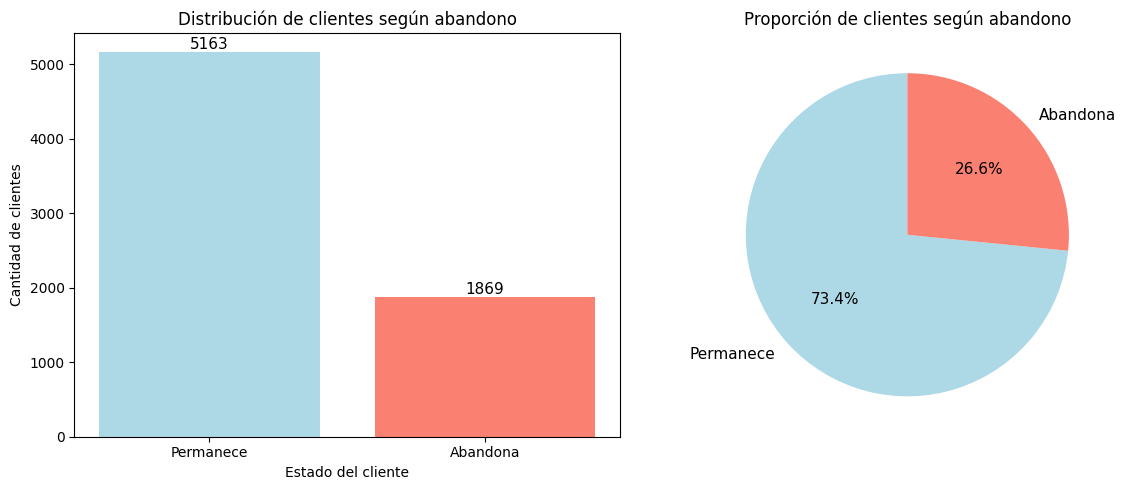

In [30]:
import matplotlib.pyplot as plt

# Contar valores de la columna 'abandono'
churn_counts = df["abandono"].value_counts()

# Renombrar categorías solo para visualización
labels = ["Permanece" if val == False else "Abandona" for val in churn_counts.index]

# Colores más suaves
colors = ["lightblue", "salmon"]

# Crear figura con 2 gráficos en la misma fila
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfico de Barras ---
bars = axes[0].bar(labels, churn_counts.values, color=colors)

# Agregar etiquetas encima de las barras
for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 str(bar.get_height()), ha='center', va='bottom', fontsize=11)

axes[0].set_title("Distribución de clientes según abandono")
axes[0].set_xlabel("Estado del cliente")
axes[0].set_ylabel("Cantidad de clientes")

# --- Gráfico de Pie ---
axes[1].pie(churn_counts,
            labels=labels,
            autopct='%1.1f%%',
            colors=colors,
            startangle=90,
            textprops={'fontsize': 11})

axes[1].set_title("Proporción de clientes según abandono")

# Mostrar ambos
plt.tight_layout()
plt.show()


##3.3 Recuento de evasión por variables categóricas

#📄Informe final